In [1]:

 # Essential libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
%cd ..
from google.colab import drive
drive.mount('./content/gdrive')

/
Mounted at ./content/gdrive


In [3]:
DATADIR = "/content/gdrive/MyDrive/Gait_analysis/all_fixed/data_150"

In [4]:
CATEGORIES = ["normal_resized150", "abnormal_resized150"]

In [5]:
# To make the training data and labels from the datadir and categories
IMG_SIZE = 64
training_data = []
labels = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            #try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append(new_array)
            
            if "abnormal_resized150" in category:
                labels.append(0)
            else:
                labels.append(1)
           # except Exception as e:
            #    pass

create_training_data()

In [6]:
# Reshaping the images as 1D array because the model takes images
# as 1D array. Also made the labels a numpy array.

X = np.array(training_data).reshape(len(training_data), 4096).astype(float)
y = np.array(labels)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

In [9]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

193
193
83
83


DECISION TREE

In [10]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion = "entropy", splitter = "best")

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
y_predicted = model.predict(X_test)

In [13]:
model.score(X_test,y_test)

0.9518072289156626

The true label says it is a abnormal gait
The model predicted it to be a abnormal gait


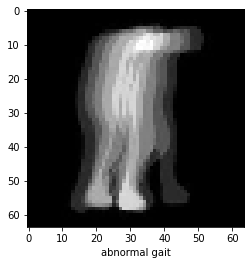

In [14]:
# predict with the trained model 
n = 5
labels = ["abnormal gait","normal gait"]
sample_image = X_test[n]
sample_label = y_test[n]
predicted_label = y_predicted[n]
model.predict([sample_image])
print("The true label says it is a", labels[predicted_label])
print("The model predicted it to be a", labels[sample_label])


# To see the predicted image, we need to change the 1D array to 2D array

example = np.reshape(sample_image, (64, 64))
plt.imshow(example, cmap = "gray")
plt.xlabel(labels[sample_label])
plt.show()

In [15]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.97      0.92      0.95        39

    accuracy                           0.95        83
   macro avg       0.95      0.95      0.95        83
weighted avg       0.95      0.95      0.95        83



In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[43,  1],
       [ 3, 36]])

Text(15.0, 0.5, 'Truth')

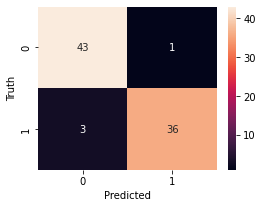

In [17]:
# Let's view a more asthetic confusion matrix

import seaborn as sn
plt.figure(figsize = (4, 3))
sn.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [19]:
y_true = y_test
#y_predicted = y_pred

In [20]:
from sklearn.metrics import recall_score
recall_score(y_true, y_predicted, pos_label=0)

0.9772727272727273

In [21]:
import sklearn
sensitivity = sklearn.metrics.recall_score(y_true , y_predicted)
sensitivity

0.9230769230769231

In [22]:
specificity = sklearn.metrics.recall_score(np.logical_not(y_true) , np.logical_not(y_predicted))
specificity

0.9772727272727273

In [23]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true, y_predicted).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)

In [24]:
print(specificity)
print(sensitivity)
print(precision)
print(recall)

0.9772727272727273
0.9230769230769231
0.972972972972973
0.9230769230769231


In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree.DecisionTreeClassifier(),X_train, y_train, cv=5)

In [26]:
scores

array([0.8974359 , 1.        , 0.97435897, 1.        , 0.94736842])

In [27]:
np.average(scores)

0.9638326585695006

In [28]:
np.max(scores)

1.0

#GridSearchCV

In [29]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV, cross_val_score
#from sklearn.cross_validation import  cross_val_score
scores = []
best_estimators = {}
import pandas as pd
max_depth_range = list(range(100))
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': max_depth_range}]

#tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
model = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)
model.fit(X_train, y_train)
#print(model.best_score_)
scores.append({
'model': tree,
'best_score': model.best_score_,
'best_params': model.best_params_
})
    
best_estimators[model] = model.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater tha

model  best_score  \
0  <module 'sklearn.tree' from '/usr/local/lib/py...    0.989744   

                              best_params  
0  {'criterion': 'gini', 'max_depth': 31}

In [30]:
model.score(X_test,y_test)

0.963855421686747